In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,43717,None,None,85772.366934
2020-06-13,43718,None,None,79667.848322
2020-06-14,43719,None,None,74005.975921
2020-06-15,43720,None,None,68672.772543
2020-06-16,43721,None,None,63920.176787
...,...,...,...,...
2021-03-29,44007,None,None,68133.600241
2021-03-30,44008,None,None,66806.418637
2021-03-31,44009,None,None,65103.302502


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-02_2021-04-02-17-02.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-01_2021-04-01-15-15.pickle


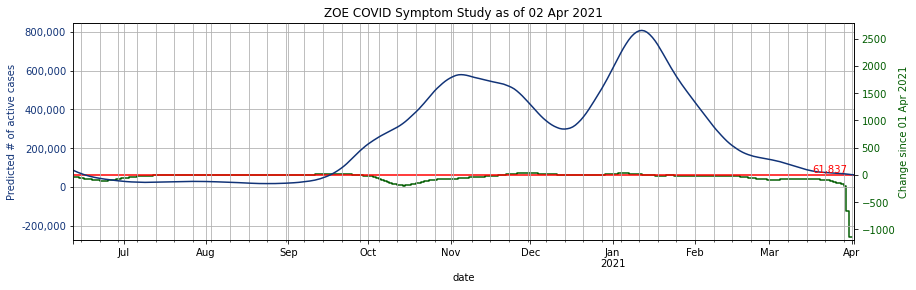

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

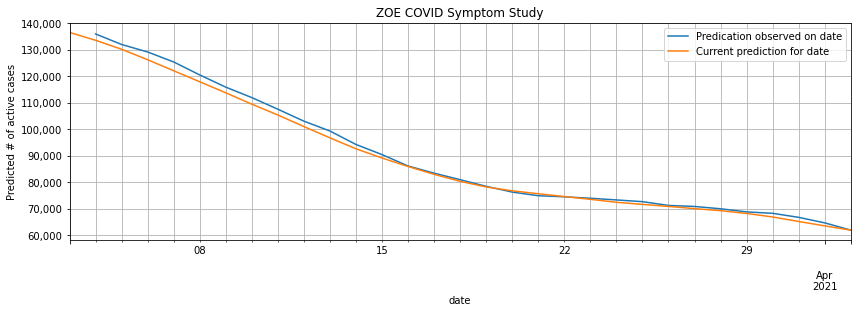

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-04-02_2021-04-02-17-02.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
323,North Lanarkshire,S12000044,1.344104
358,Belfast,N09000003,0.643481
317,Renfrewshire,S12000038,0.515381
25,Leicester,E06000016,0.452913
17,North East Lincolnshire,E06000012,0.372939
187,South Holland,E07000140,0.350171
376,South Lanarkshire,S12000029,0.337102
387,Powys,W06000023,0.330371
249,Wakefield,E08000036,0.281948
342,Bridgend,W06000013,0.274847
